# Lab1 Titanic passangers' data analysis
---

By doing this lab you should get acquinted with API of basic machine learning python libraries such as:

* scikit-learn
* numpy
* pandas
* matplotlib

This task will give ?? points

## TASK:

[Kaggle](https://www.kaggle.com/) is a data analysis competition platform. Even if you don't interested in that kind of competitions (but there is assumption that you should be interested), there are a lot of examples of rather good data analysis, called [kernels](https://www.kaggle.com/kernels) in kaggle terminology, that you can consult during this course.

1. You should register on [Kaggle](https://www.kaggle.com/) to be able to download datasets.
2. Download dataset `train.csv` from [Titanic: Machine Learning from Disaster](http://www.kaggle.com/c/titanic-gettingStarted/data). You will find dataset description there as well.
3. Every research or analysis are meaningless without right questions, hypothesises? To warm up you need to find meaningfull answers for the next questions:
    - How many passengers was travelling by first class?
    - What is the most popular female name on board?
    - How does ticket cost varie?
    - What titles (ex.: Mrs., Mr.) you could find in dataset and which class did they travel?
    - Are there any dependencies between class and ticket number?
    - What part of passengers was able to survive?
    - Are there any correlation between the number of brothers/sisters and the number of parents/kids ?
   
4. Try to find some correlations or dependencies manually and support/prove them with graphs or statistics. Find some exact rules describing some subset of survived class. What can you say about interpretation complexity of there rules? 
5. Check the following assumptions:
    - Females survived more frequently than mens
    - Passangers with more expensive tickets survived with higher probability
    
## Report

All reports should be delivered in the format of IPython (Jupyter) Notebooks (`.ipynb` files). 



## TOOLS AND LINKS

  * [Collection of interesting notebooks](https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks)

###  Python libraries

  * [NumPy](http://www.numpy.org/)
    - [graph library Matlab](http://wiki.scipy.org/NumPy_for_Matlab_Users)
  * [Pandas](http://pandas.pydata.org/)
    - [how to work with datasets using pandas](http://nbviewer.ipython.org/github/agconti/kaggle-titanic/blob/master/Titanic.ipynb)
  * [Matplotlib](http://matplotlib.org/index.html)
    - [pyplot](http://matplotlib.org/api/pyplot_api.html) — matlab graph utility emulation in python
    - [example gallery](http://matplotlib.org/gallery.html)
  * [SciPy](http://scipy.org/)





# Answers by Grishina Anastasiia

### How many passengers was travelling by first class?

Re: 216

In [131]:
import pandas as pd
import csv

Working_dir = "C:\\Users\\aagri\\Documents\\Python Scripts\\titanic\\"
train_df = pd.read_csv(Working_dir + "train.csv")

VIP_passengers = train_df [ train_df[ "Pclass" ] == 1 ].count()[ "PassengerId" ]
print ( VIP_passengers )

216


-----------------------------------------

### What is the most popular female name on board?

Re: Anna, 15 



The name is found based on the following:

Heikkinen, Miss. Laina -> Laina

Futrelle, Mrs. Jacques Heath (Lily May Peel) -> Lily

Hewlett, Mrs. (Mary D Kingcome) -> Mary

McGowan, Miss. Anna "Annie" -> Anna

Yrois, Miss. Henriette ("Mrs Harbeck") -> Henriette

In [132]:
# ladies = names of all women
ladies = train_df [ train_df[ "Sex" ]=="female" ]["Name"]

# list of names
l_names = ['']

for string in ladies:
    # search for name only after the title
    s = string.split(". ")
    s = s[1]
    # if bracket occurs => first after the bracket without quotes
    if '(' in s:
        if not ('("' in s ):
            s = s.split( "(" )[1]
            
    # delete unwanted character
    for c in ')"':
        s = s.replace( c, "" )
        
    # extract name
    s = s.split(" ")[0]
    l_names.append( s )

count_names = []
for i in range (0, len(l_names)):
    count_names.append( l_names.count(l_names[i]) )
    
print ( l_names [ count_names.index ( max( count_names ) ) ] )
print ( max( count_names ) )

Anna
15


-----------------------------------------

### How does ticket cost varie?

Re: in output of the cells, i.e. min = 0; max = 512.329

In [133]:
fare = 0
i = 0
num = 0
for i in range(1,4):
    fare = train_df[ train_df[ "Pclass" ] == i  ][ "Fare" ].min()
    print ( "Class %i: Minimal ticket fare is %.3f" %(i, fare) )
    
    fare = train_df[ train_df[ "Pclass" ] == i  ][ "Fare" ].max()
    print ( "Class %i: Minimal ticket fare is %.3f" %(i, fare) )

    for num in range( 1, len(train_df[ "Fare" ]) ):
        if train_df[ "Pclass" ][num] == i \
        and train_df[ "Fare" ][num] > 0 \
        and train_df[ "Fare" ][num] <> 0 \
        and fare > train_df[ "Fare" ][num]:
            fare = train_df[ "Fare" ][num]
        
    print ( "Class %i: Minimal non-zero ticket fare is %.3f" %(i, fare))
    print('')

Class 1: Minimal ticket fare is 0.000
Class 1: Minimal ticket fare is 512.329
Class 1: Minimal non-zero ticket fare is 5.000

Class 2: Minimal ticket fare is 0.000
Class 2: Minimal ticket fare is 73.500
Class 2: Minimal non-zero ticket fare is 10.500

Class 3: Minimal ticket fare is 0.000
Class 3: Minimal ticket fare is 69.550
Class 3: Minimal non-zero ticket fare is 4.013



-----------------------------------------

### What titles (ex.: Mrs., Mr.) you could find in dataset and which class did they travel?

Re: in output of the cells

In [134]:
titles = []
titles_all = train_df["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)
[titles.append(x) for x in titles_all if x not in titles]
print(titles)

['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess', 'Jonkheer']


but the pre-last title should be 'the Countess'

In [135]:
titles = []
all_names = train_df ["Name"]

for name in all_names:
    name = name.split(", ")[1]
    name = name.split(". ")[0]
    if not(name in titles):
        titles.append(name)
print(titles)

['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess', 'Jonkheer']


here we are looking for the number of the passengers in each class for every particular title

In [136]:
passengers_classes = pd.DataFrame( 0, index = titles, columns=["Class 1", "Class 2", "Class 3"]) 

for i in range (0, len(all_names) ):
    name = train_df["Name"][i].split(", ")[1]
    name = name.split(". ")[0]
    if train_df["Pclass"][i] == 1:
        passengers_classes.ix[name,'Class 1'] += 1
    elif train_df["Pclass"][i] == 2:
        passengers_classes.ix[name,'Class 2'] += 1
    else:
        passengers_classes.ix[name,'Class 3'] += 1

print (passengers_classes)

              Class 1  Class 2  Class 3
Mr                107       91      319
Mrs                42       41       42
Miss               46       34      102
Master              3        9       28
Don                 1        0        0
Rev                 0        6        0
Dr                  5        2        0
Mme                 1        0        0
Ms                  0        1        0
Major               2        0        0
Lady                1        0        0
Sir                 1        0        0
Mlle                2        0        0
Col                 2        0        0
Capt                1        0        0
the Countess        1        0        0
Jonkheer            1        0        0


-----------------------------------------

### Are there any dependencies between class and ticket number?

#### class 1


* 60.648 percent of tickets of class 1 begin with '1'

* If we also count tickets starting with str characters, 88.889 percent of tickets of class 1 begin with '1'

* Tickets starting with characters 'PC' compose 27.778 percent of all 1st class tickets

In [137]:
class_1 = train_df[train_df[ "Pclass" ] == 1 ]["Ticket"] 
print (class_1.head())

total_num_begin_with_1 = 0
s = ''
for s in class_1:
    if s[0] == "1":
        total_num_begin_with_1 = total_num_begin_with_1 + 1
print ( '' )
print ( "%2.3f percent of tickets of class 1 begin with '1'" %( ( total_num_begin_with_1/float(len(class_1)) ) * 100. ) )

1     PC 17599
3       113803
6        17463
11      113783
23      113788
Name: Ticket, dtype: object

60.648 percent of tickets of class 1 begin with '1'


In [138]:
s =''
total_num_begin_with_letter_1 = 0
for s in class_1:
    if s[0] <> "1" and " " in s:
        s = s.split(" ")[1]
        if s[0] == "1":
            total_num_begin_with_letter_1 += 1
print ( "If we also count tickets starting with str characters, " )
print ( "%2.3f percent of tickets of class 1 begin with '1'" %( ( total_num_begin_with_1 + total_num_begin_with_letter_1 )\
                                                                 /float(len(class_1) ) * 100. ) ) 

If we also count tickets starting with str characters, 
88.889 percent of tickets of class 1 begin with '1'


In [139]:
count_class_1_PC = 0
for s in class_1:
    if s[0:2] == "PC":
        count_class_1_PC = count_class_1_PC + 1
print ( "Tickets starting with characters 'PC' compose " )
print ( "%2.3f percent of all 1st class tickets" %( count_class_1_PC / float(len(class_1)) * 100. ) )

Tickets starting with characters 'PC' compose 
27.778 percent of all 1st class tickets


#### class 2
* 64.674 percent of tickets of class 2 begin with '2'

* If we also count tickets starting with str characters, 73.913 percent of tickets of class 2 begin with '2'

* all the tickets with code "STON/O2." and "STON/O 2." begin with 3102

In [140]:
class_2 = train_df[train_df[ "Pclass" ] == 2 ]["Ticket"] 
print (class_2.head())

total_num_begin_with_2 = 0
for s in class_2:
    if s[0] == "2":
#         print ( s )
        total_num_begin_with_2 += 1
print ( '' )
print ( "%2.3f percent of tickets of class 2 begin with '2'" %( ( total_num_begin_with_2/float(len(class_2)) ) * 100. ) )

9     237736
15    248706
17    244373
20    239865
21    248698
Name: Ticket, dtype: object

64.674 percent of tickets of class 2 begin with '2'


In [141]:
total_num_begin_with_letter_2 = 0
for s in class_2:
    if s[0] <> "2" and " " in s:
        s = s.split(" ")[1]
        if s[0] == "2":
            total_num_begin_with_letter_2 += 1
print ( "If we also count tickets starting with str characters, " )
print ( "%2.3f percent of tickets of class 2 begin with '2'" %( ( total_num_begin_with_2 + total_num_begin_with_letter_2 )\
                                                                 /float(len(class_2) ) * 100. ) )

If we also count tickets starting with str characters, 
73.913 percent of tickets of class 2 begin with '2'


#### class 3
* 57.434 percent of tickets of class 2 begin with '2'

* If we also count tickets starting with str characters, 73.913 percent of tickets of class 2 begin with '2'

* Tickets starting with characters 'STON/O2. or STON O 2.' compose 3.666 percent of all 3d class tickets

In [142]:
class_3 = train_df[train_df[ "Pclass" ] == 3 ]["Ticket"] 

total_num_begin_with_3 = 0
for s in class_3:
    if s[0] == "3":
        total_num_begin_with_3 = total_num_begin_with_3 + 1
print ( '' )
print ( "%2.3f percent of tickets of class 3 begin with '3'" %( ( total_num_begin_with_3/float(len(class_3)) ) * 100. ) )


57.434 percent of tickets of class 3 begin with '3'


In [143]:
count_class_3_STON = 0
for s in class_3:
    if s[0:3] == "STO":
        count_class_3_STON += 1
        print ( s )
print ( "Tickets starting with characters 'STON/O2. or STON O 2.' compose " )
print ( "%2.3f percent of all 3d class tickets" %( count_class_3_STON / float(len(class_3)) * 100. ) )

STON/O2. 3101282
STON/O 2. 3101294
STON/O2. 3101279
STON/O 2. 3101280
STON/O2. 3101283
STON/O 2. 3101275
STON/O 2. 3101293
STON/O 2. 3101289
STON/O2. 3101279
STON/O 2. 3101269
STON/O 2. 3101274
STON/O 2. 3101286
STON/O 2. 3101273
STON/O 2. 3101292
STON/O 2. 3101285
STON/O2. 3101271
STON/O 2. 3101288
STON/O2. 3101290
Tickets starting with characters 'STON/O2. or STON O 2.' compose 
3.666 percent of all 3d class tickets


-----------------------------------------

### What part of passengers was able to survive?

In [144]:
print ( "%i people survived" %sum( train_df [ 'Survived' ] ) )
print ( "This is %i percent of all passengers" %(sum( train_df [ 'Survived' ] ) /float ( len ( train_df.index) ) *100 ) )


342 people survived
This is 38 percent of all passengers


-----------------------------------------

### Are there any correlation between the number of brothers/sisters and the number of parents/kids ?

Re:
* There are 142 passengers with family members aboard
* In percentage they compose ~16% of all passengers
* There are members of the family with 8 Siblings/Spouses and 2 Parents/Children on board ( but in the train set there is no person with 9 SibSp and 1 Parch, so the parents  ust be in the train set
* There are members of the family with 5 Siblings/Spouses and 2 Parents/Children on board
* families with 4 Siblings/Spouses have 1 or 2 Parents/Children members
* families with 3 Siblings/Spouses have 0 - 2 Parents/Children members


In [145]:
train_df[ [ 'SibSp', 'Parch' ] ].corr()

,SibSp,Parch
SibSp,1.000000,0.414838
Parch,0.414838,1.000000


passengers with family members

In [146]:
print( len ( train_df[ ( train_df['SibSp'] > 0 ) & ( train_df['Parch'] > 0 ) ] ) )

142


In percentage they compose ~16% of all passengers

In [147]:
float ( len ( train_df[ ( train_df['SibSp'] > 0 ) \
                       & ( train_df['Parch'] > 0 ) ].index ) ) / float ( len ( train_df.index) ) * 100

15.937149270482603

In [148]:
Sibsp_group_by_sib = list ( train_df[['PassengerId','SibSp', 'Parch']].groupby(train_df["SibSp"]) )

print ( Sibsp_group_by_sib )

[(0,      PassengerId  SibSp  Parch
2              3      0      0
4              5      0      0
5              6      0      0
6              7      0      0
8              9      0      2
11            12      0      0
12            13      0      0
14            15      0      0
15            16      0      0
17            18      0      0
19            20      0      0
20            21      0      0
21            22      0      0
22            23      0      0
23            24      0      0
26            27      0      0
28            29      0      0
29            30      0      0
30            31      0      0
32            33      0      0
33            34      0      0
36            37      0      0
37            38      0      0
42            43      0      0
44            45      0      0
45            46      0      0
47            48      0      0
51            52      0      0
54            55      0      1
55            56      0      0
..           ...    ...    ...
848

In [149]:
Sibsp_group_by_par = list ( train_df[['PassengerId','SibSp', 'Parch']].groupby(train_df["Parch"]) )

print ( Sibsp_group_by_par )

[(0,      PassengerId  SibSp  Parch
0              1      1      0
1              2      1      0
2              3      0      0
3              4      1      0
4              5      0      0
5              6      0      0
6              7      0      0
9             10      1      0
11            12      0      0
12            13      0      0
14            15      0      0
15            16      0      0
17            18      0      0
18            19      1      0
19            20      0      0
20            21      0      0
21            22      0      0
22            23      0      0
23            24      0      0
26            27      0      0
28            29      0      0
29            30      0      0
30            31      0      0
31            32      1      0
32            33      0      0
33            34      0      0
34            35      1      0
35            36      1      0
36            37      0      0
37            38      0      0
..           ...    ...    ...
847

In [150]:
Sibsp_group_by_sib_par = list ( train_df[['PassengerId','SibSp', 'Parch']].groupby(['SibSp', 'Parch']) )

print ( Sibsp_group_by_sib_par )

[((0, 0),      PassengerId  SibSp  Parch
2              3      0      0
4              5      0      0
5              6      0      0
6              7      0      0
11            12      0      0
12            13      0      0
14            15      0      0
15            16      0      0
17            18      0      0
19            20      0      0
20            21      0      0
21            22      0      0
22            23      0      0
23            24      0      0
26            27      0      0
28            29      0      0
29            30      0      0
30            31      0      0
32            33      0      0
33            34      0      0
36            37      0      0
37            38      0      0
42            43      0      0
44            45      0      0
45            46      0      0
47            48      0      0
51            52      0      0
55            56      0      0
56            57      0      0
57            58      0      0
..           ...    ...    ..

In [151]:
max( train_df['SibSp'] )

8

In [152]:
max( train_df['Parch'] )

6

-----------------------------------------

### Females survived more frequently than mens

In [153]:
print ( len ( train_df[ ( train_df['Sex'] == 'female' ) & ( train_df['Survived'] == 1 ) ].index )>\
    len ( train_df[ ( train_df['Sex'] == 'male' ) & ( train_df['Survived'] == 1 ) ].index ) )

True


In [154]:
print( "Survived women: %i" % (len ( train_df[ ( train_df['Sex'] == 'female' ) \
                                                 & ( train_df['Survived'] == 1 ) ]['Survived'].index ) ) )
print( "Survived men: %i" % (len ( train_df[ ( train_df['Sex'] == 'male' ) \
                                               & ( train_df['Survived'] == 1 ) ]['Survived'].index ) ) )

Survived women: 233
Survived men: 109


### Dependence of survival on the port of embarkation

#### Passengers who embarked in the port S survived more frequently

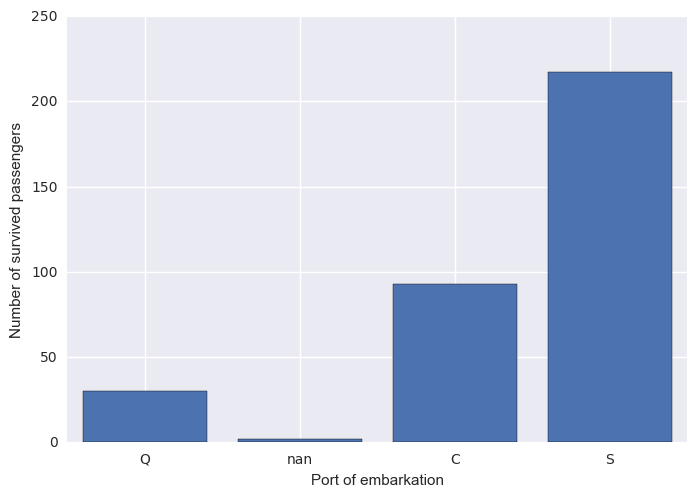

In [155]:
import collections
import numpy as np
import matplotlib.pyplot as plt

survived_in_embark = list ( train_df [ train_df['Survived'] == 1 ] ['Embarked'] )
survived_in_embark_count = collections.Counter ( survived_in_embark )

fig = plt.figure()
ax = fig.add_subplot(111)

frequencies = survived_in_embark_count.values()
names = survived_in_embark_count.keys()

x_coordinates = np.arange(len(survived_in_embark_count))
ax.bar(x_coordinates, frequencies, align='center')
ax.xaxis.set_major_locator(plt.FixedLocator(x_coordinates))
ax.xaxis.set_major_formatter(plt.FixedFormatter(names))
plt.ylabel('Number of survived passengers')
plt.xlabel('Port of embarkation')

plt.show()

-------------------------------------------------------------

### Dependence of survival on the 1st letter of cabin name and thus on the place of the passenger on board the ship

#### * there is too many 'nan' data in cabin name column
#### * passengers from cabins that start with "B" and "C" survived more frequently than from the cabin with other letters

In [156]:
survived_in_cabins =  list ( train_df [ train_df['Survived'] == 1 ] ['Cabin'] )
not_survived_in_cabins = list ( train_df [ train_df['Survived'] == 0 ] ['Cabin'] )
not_survived_in_cabins

[nan,
 nan,
 nan,
 'E46',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'C23 C25 C27',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'B30',
 nan,
 nan,
 nan,
 'C83',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'F G73',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'E31',
 nan,
 nan,
 nan,
 'A5',
 nan,
 nan,
 nan,
 'D26',
 nan,
 nan,
 nan,
 nan,
 'C110',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'B58 B60',
 nan,
 nan,
 nan,
 nan,
 'D26',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'C123',
 nan,
 'B86',
 nan,
 nan,
 nan,
 nan,
 nan,
 'F2',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'B19',
 nan,
 nan,
 'A7',
 nan,
 nan,
 'C49',
 nan,
 nan,
 nan,
 nan,
 nan,
 'A32',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'G6',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 n

In [157]:
survived_in_cabins_df = pd.DataFrame( 0, index =[ "A", "B", "C", "D", "E", "F", "G", "T", "nan" ], \
                                     columns=["Survived", "Not survived"]) 
for cabin in survived_in_cabins:
    cabin = str (cabin)
    if not cabin == 'nan':
        survived_in_cabins_df.ix[ cabin[0], "Survived"] += 1
    else:
        survived_in_cabins_df.ix[cabin, "Survived"] += 1
        
for cabin in not_survived_in_cabins:
    cabin = str (cabin)
    if not cabin == 'nan':
        survived_in_cabins_df.ix[ cabin[0], "Not survived"] += 1
    else:
        survived_in_cabins_df.ix[cabin, "Not survived"] += 1
        
# print( survived_in_cabins_df["Survived"].values.tolist() )
print( survived_in_cabins_df )

     Survived  Not survived
A           7             8
B          35            12
C          35            24
D          25             8
E          24             8
F           8             5
G           2             2
T           0             1
nan       206           481


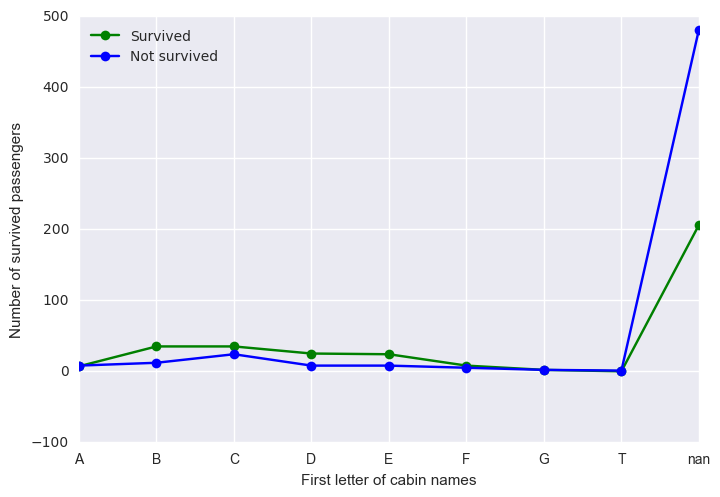

In [158]:
fig = plt.figure()
ax = fig.add_subplot(111)
x_axis=[ "A", "B", "C", "D", "E", "F", "G", "T", 'nan' ]
ax.plot( survived_in_cabins_df["Survived"].values.tolist(),'go-', label = 'Survived') 
ax.plot( survived_in_cabins_df["Not survived"].values.tolist(),'bo-', label = 'Not survived') 
plt.setp(ax.get_xticklabels(), visible=True)
plt.xticks(range(len(x_axis)), x_axis, size='small')
plt.ylim( -100, 500)
plt.xlabel('First letter of cabin names')
plt.ylabel('Number of survived passengers')
plt.legend(loc = 'best')
plt.show()

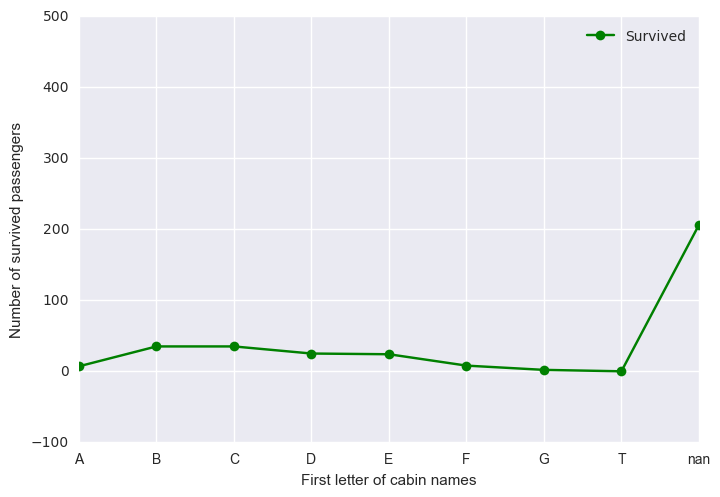

In [159]:
fig = plt.figure()
ax = fig.add_subplot(111)
x_axis=[ "A", "B", "C", "D", "E", "F", "G", "T", 'nan' ]
ax.plot( survived_in_cabins_df["Survived"].values.tolist(),'go-', label = 'Survived') 
plt.setp(ax.get_xticklabels(), visible=True)
plt.xticks(range(len(x_axis)), x_axis, size='small')
plt.ylim( -100, 500)
plt.xlabel('First letter of cabin names')
plt.ylabel('Number of survived passengers')
plt.legend(loc = 'best')
plt.show()

-------------------------------------------------------------

### Dependencies between age and survival

#### the greatest part of survived people are of the age 20-40 (150 people)
#### the highest death rate is for the same age interval, and may be eplained by the fact that most of the people on board were aged 20-40


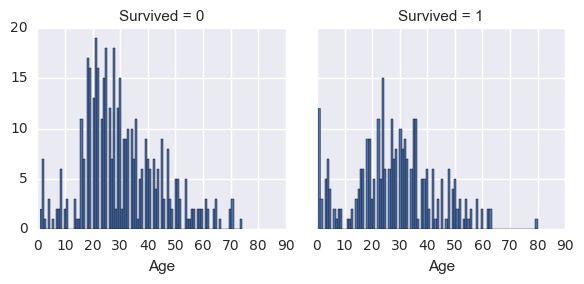

In [160]:
import seaborn as sns
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=100 )
plt.show()

In [161]:
print( max( train_df["Age"] ) , min( train_df["Age"] ) ) 

(80.0, 0.41999999999999998)


In [162]:
survived_age = list ( train_df [ train_df['Survived'] == 1 ] ['Age'] )
survived_age_interv = pd.DataFrame ( 0, index = \
                                    ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)',
                                    '[50-60)', '[60-70)', '[70-80]', 'nan'], columns = ['Survived'] )
for age in survived_age:
    if (str(age) == 'nan'):
        survived_age_interv.ix['nan','Survived'] +=1 
    if age < 10.:
        survived_age_interv.ix['[0-10)','Survived'] +=1 
    elif age < 20.:
        survived_age_interv.ix['[10-20)','Survived'] +=1 
    elif age < 30.:
        survived_age_interv.ix['[20-30)','Survived'] +=1 
    elif age < 40.:
        survived_age_interv.ix['[30-40)','Survived'] +=1 
    elif age < 50.:
         survived_age_interv.ix['[40-50)','Survived'] +=1 
    elif age < 60.:
         survived_age_interv.ix['[50-60)','Survived'] +=1 
    elif age < 70.:
         survived_age_interv.ix['[60-70)','Survived'] +=1 
    else:
         survived_age_interv.ix['[70-80]','Survived'] +=1
print ( survived_age_interv)


         Survived
[0-10)         38
[10-20)        41
[20-30)        77
[30-40)        73
[40-50)        34
[50-60)        20
[60-70)         6
[70-80]        53
nan            52
